# **Graded Notebook**

#### **Dataset Information**

We will use the **Advertising dataset**. This dataset contains information on advertising budgets for TV, radio, and newspapers, and their relationship with product sales.

You can download the dataset using the following steps:

1. Open your web browser and navigate to this link: [Advertising.csv](https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Advertising.csv)
2. Right-click on the page and select **Save As** (or the equivalent option in your browser).
3. Save the file as `Advertising.csv` in the same directory as this notebook.

## **Task 1: Predicting Sales from Advertising Data**

### **1. Data Exploration and Preparation (10 points)**

#### **1.1: Load, inspect and display the dataset (10 points)**
- Load the provided dataset (`Advertising.csv`).
- Display, print or plot any relevant information.
- What can you say about the data?


In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# load data from csv file
file_name = 'Advertising.csv'
df = pd.read_csv(file_name)

In [6]:
# Information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### Data verification

In [8]:
# check for missing values
null_counts = df.isnull().sum()
print("\nNull values in each column:")
for column, count in null_counts.items():
    print(f"{column}: {count}")

# check for duplicate rows
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)


Null values in each column:
Unnamed: 0: 0
TV: 0
Radio: 0
Newspaper: 0
Sales: 0

Number of duplicate rows: 0


### Observations:
- The dataset is composed of 200 rows and 4 columns.
- The columns are TV, Radio, Newspaper, and Sales.
- The features are TV, Radio, and Newspaper and the target is Sales.
- All the values are numerical and there are no missing values or duplicates.

This dataset seems to have information about the advertising budgets for TV, radio, and newspapers, and their relationship with product sales. 
The unit of the budget is not mentioned in the dataset, but it is assumed to be in thousands of dollars 
The unit of the sales is not mentioned in the dataset, but it is assumed to be in thousands of units 
> The unit where not mentioned in the dataset, but it is assumed to be in thousands of dollars for the budget and thousands of units for the sales after observing the values in the dataset and make a fast research on the internet.


### Preprocessing of the data

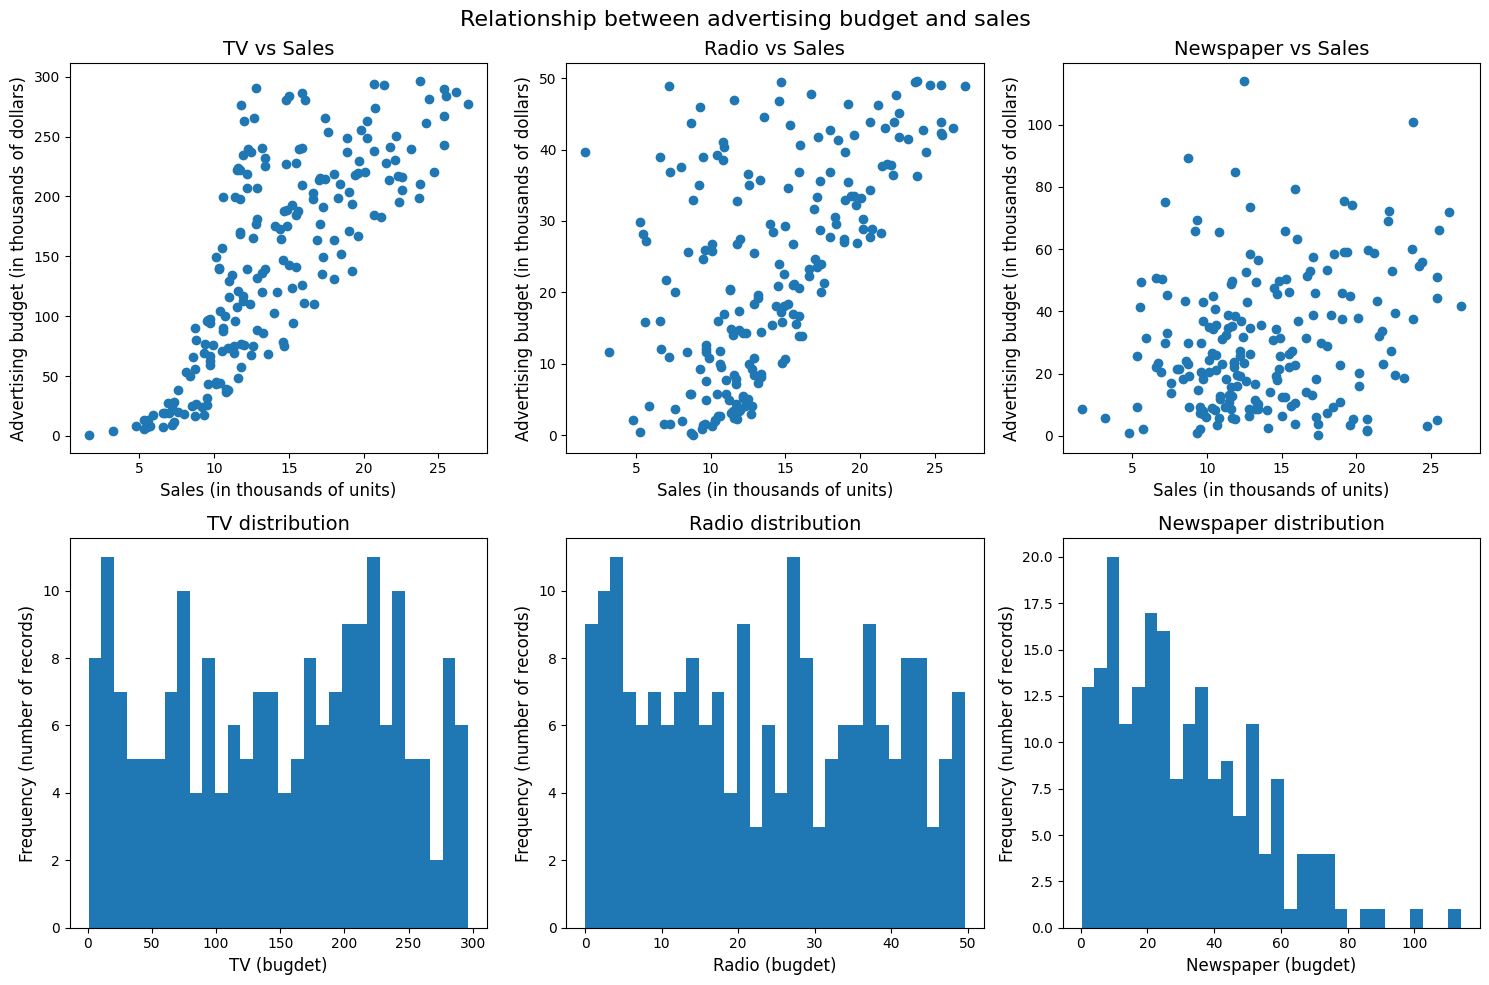

In [9]:
# prepare data for plotting
features = df[['TV', 'Radio', 'Newspaper']].values
target = df['Sales'].values

feature_names = df.columns[1:-1]
target_name = df.columns[-1]

# Update the plotting code with inverted axes for scatter plots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i in range(len(feature_names)):
   
    # scatter plot to show the relationship between the feature and target
    axs[0,i].scatter(target, features[:, i])  
    axs[0,i].set_ylabel("Advertising budget (in thousands of dollars)", fontsize=12)
    axs[0,i].set_xlabel(target_name+ " (in thousands of units)", fontsize=12)
    axs[0,i].set_title(f'{feature_names[i]} vs {target_name}', fontsize=14)
    axs[0,i].tick_params(axis='both', which='major', labelsize=10)
    
    # histogram to show the distribution of the feature
    axs[1,i].hist(features[:, i], bins=30)
    axs[1,i].set_xlabel(feature_names[i] + " (bugdet)", fontsize=12)
    axs[1,i].set_ylabel('Frequency (number of records)', fontsize=12)
    axs[1,i].set_title(f'{feature_names[i]} distribution', fontsize=14)
    axs[1,i].tick_params(axis='both', which='major', labelsize=10)


# add a main title to the plot
plt.suptitle("Relationship between advertising budget and sales", fontsize=16)
# use tight_layout to improve spacing of subplots 
plt.tight_layout()

plt.show()


---

### **2. Regression Analysis (40 points)**

#### **2.1: Train a Linear Regression Model (15 points)**
- Train a linear regression model for each feature and evaluate them.
- Display, print or plot any relevant information.
- Interpret the results.


In [10]:
# Import necessary libraries
from colorama import Fore, Style
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


Model for TV
Mean Squared Error: 8.97
Mean Absolute Error: 2.28
R^2 Score: 0.67

Model for Radio
Mean Squared Error: 23.72
Mean Absolute Error: 3.70
R^2 Score: 0.13

Model for Newspaper
Mean Squared Error: 28.87
Mean Absolute Error: 4.56
R^2 Score: -0.06


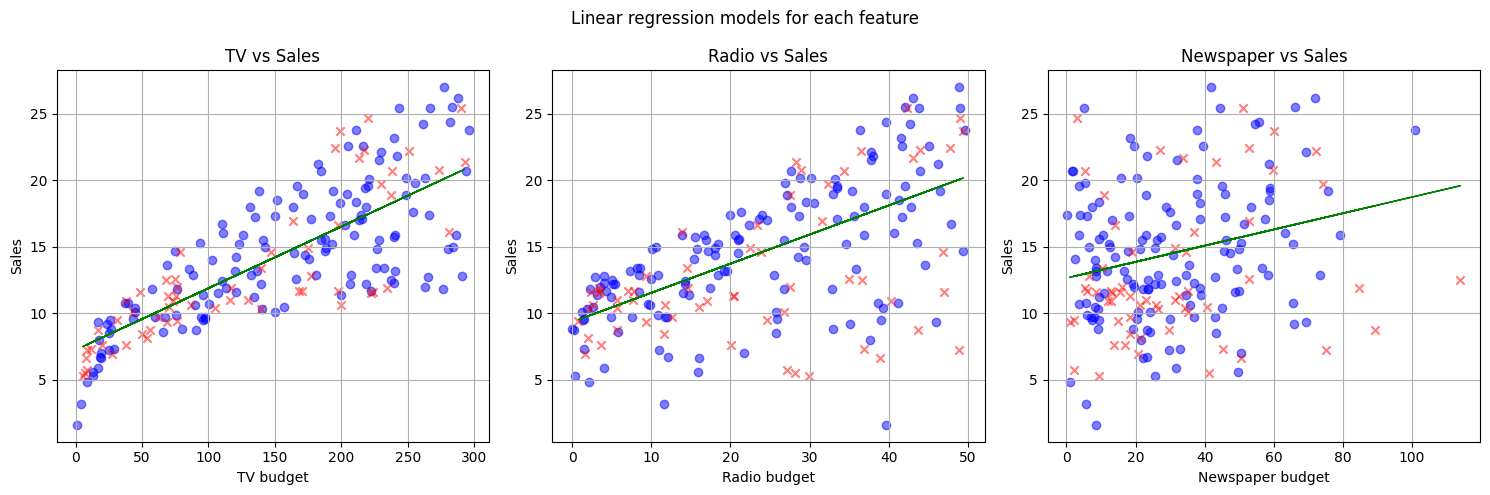

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Iterate over each feature
for i in range(len(feature_names)):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(features[:, i], target, test_size=0.3, random_state=42)

    # Reshape the data to a 2D array for the model fit
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)
    Y_train = y_train.reshape(-1, 1)
    Y_test = y_test.reshape(-1, 1)
    
    # Create a linear regression model
    model = LinearRegression()
    model.fit(X_train, Y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # plot the model 
    axs[i].scatter(X_train, Y_train, color='blue',alpha=0.5)
    axs[i].scatter(X_test, Y_test, color='red',marker='x',alpha=0.5)
   
    axs[i].plot(X_test, y_pred, color='green', linewidth=1)
    axs[i].set_title(f'{feature_names[i]} vs Sales')
    axs[i].set_xlabel(f'{feature_names[i]} budget')
    axs[i].set_ylabel('Sales')
    axs[i].grid(True)
    
    # Print the model's performance
    mse = mean_squared_error(Y_test, y_pred)
    mae = mean_absolute_error(Y_test, y_pred)
    r2 = r2_score(Y_test, y_pred)
    
    print(f"\n{Fore.BLUE}Model for {feature_names[i]}{Style.RESET_ALL}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R^2 Score: {r2:.2f}")
    
    
plt.suptitle('Linear regression models for each feature')
plt.tight_layout()
plt.show()
    




# TODO explain

#### **2.2: Polynomial Features (25 points)**
- Extend the regression model by adding polynomial features.
- Evaluate the models performances.
- Display, print or plot any relevant information.
- Discuss which model fits the data best and why.

In [12]:
%pip install prettytable

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\david\AppData\Local\Temp\ipykernel_64936\3636501880.py:57: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  performance = pd.concat([performance, pd.DataFrame([{


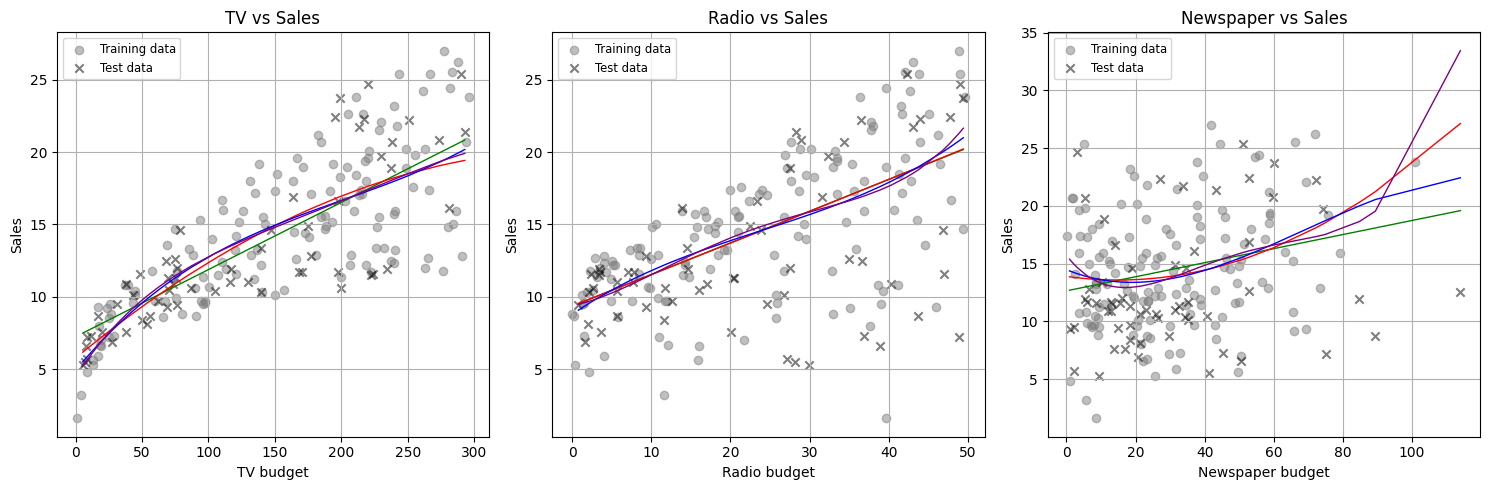

+----------------------------------------------+
|              Model Performance               |
+-----------+--------+--------+-------+--------+
|  Feature  | Degree |  MSE   |  MAE  |   R2   |
+-----------+--------+--------+-------+--------+
|     TV    |   1    | 8.971  | 2.276 | 0.671  |
|     TV    |   2    | 9.416  | 2.351 | 0.655  |
|     TV    |   3    | 9.422  | 2.368 | 0.655  |
|     TV    |   4    | 9.394  | 2.366 | 0.656  |
|   Radio   |   1    | 23.723 | 3.703 | 0.131  |
|   Radio   |   2    | 23.716 | 3.701 | 0.131  |
|   Radio   |   3    | 23.825 |  3.72 | 0.127  |
|   Radio   |   4    | 24.086 | 3.715 | 0.118  |
| Newspaper |   1    | 28.869 |  4.56 | -0.057 |
| Newspaper |   2    | 33.042 | 4.769 | -0.21  |
| Newspaper |   3    | 30.378 | 4.627 | -0.113 |
| Newspaper |   4    | 35.025 | 4.737 | -0.283 |
+-----------+--------+--------+-------+--------+


In [22]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Define colors for different degrees
colors = ['green', 'red', 'blue', 'purple']

# Create array of degrees from 1 to 20
degrees = np.arange(1, 5)

# To use the colors in sequence matching degrees length:
color_sequence = [colors[i % len(colors)] for i in range(20)]


# create table to store the model performance metrics for each feature and for each degree
performance = pd.DataFrame(columns=['Feature', 'Degree', 'MSE', 'MAE', 'R2'])


# Iterate over each feature
for i in range(len(feature_names)):
    # Split data once per feature
    X_train, X_test, y_train, y_test = train_test_split(features[:, i], target, test_size=0.3, random_state=42)
    
    # Plot data points
    axs[i].scatter(X_train, y_train, color='gray', alpha=0.5, label='Training data')
    axs[i].scatter(X_test, y_test, color='black', marker='x', alpha=0.5, label='Test data')
    
   # Reshape data
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)

    # Sort X_test for smooth line plotting only
    X_test_sorted = np.sort(X_test, axis=0)

    for deg, color in zip(degrees, color_sequence):
        # Create polynomial features
        poly = PolynomialFeatures(degree=deg)
        X_train_poly = poly.fit_transform(X_train)
        
        # Create two versions of test data - sorted (for plotting) and unsorted (for metrics)
        X_test_poly = poly.transform(X_test)  # unsorted - for metrics
        X_test_sorted_poly = poly.transform(X_test_sorted)  # sorted - for plotting
        
        # Fit model
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        
        # Plot using sorted data
        y_pred_plot = model.predict(X_test_sorted_poly)
        axs[i].plot(X_test_sorted, y_pred_plot, color=color, linewidth=1)
        
        # Calculate metrics using unsorted data
        y_pred = model.predict(X_test_poly)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Append to the performance table
        performance = pd.concat([performance, pd.DataFrame([{
            'Feature': feature_names[i], 
            'Degree': deg, 
            'MSE': mse, 
            'MAE': mae, 
            'R2': r2
        }])], ignore_index=True)
    
    axs[i].set_title(f'{feature_names[i]} vs Sales')
    axs[i].set_xlabel(f'{feature_names[i]} budget')
    axs[i].set_ylabel('Sales')
    axs[i].grid(True)
    axs[i].legend(fontsize='small')

plt.tight_layout()
plt.show()

# Display the performance metrics for each feature and degree

# Round numeric columns to 3 decimal places
performance = performance.round(3)

table = PrettyTable()
table.title = 'Model Performance'
table.field_names = performance.columns

for row in performance.itertuples(index=False):
    table.add_row(row)

print(table)


### Observations:

---

## **Task 2: Predicting High Sales with Classification**

In this task, you will create a binary classification model to predict whether sales are above a certain threshold based on the advertising data. This will help you understand how classification models can be applied to predict categories based on features.

### **1. Dataset Generation (10 points)**

#### **1.1: Transform the advertising dataset for classification (5 points)**

- Convert the target variable into a binary classification problem using the threshold of your choice.
- Display, print or plot any relevant information.
- Explain your threshold choice.

Threshold (Average Sales): 14.02
High_Sales
0    111
1     89
Name: count, dtype: int64


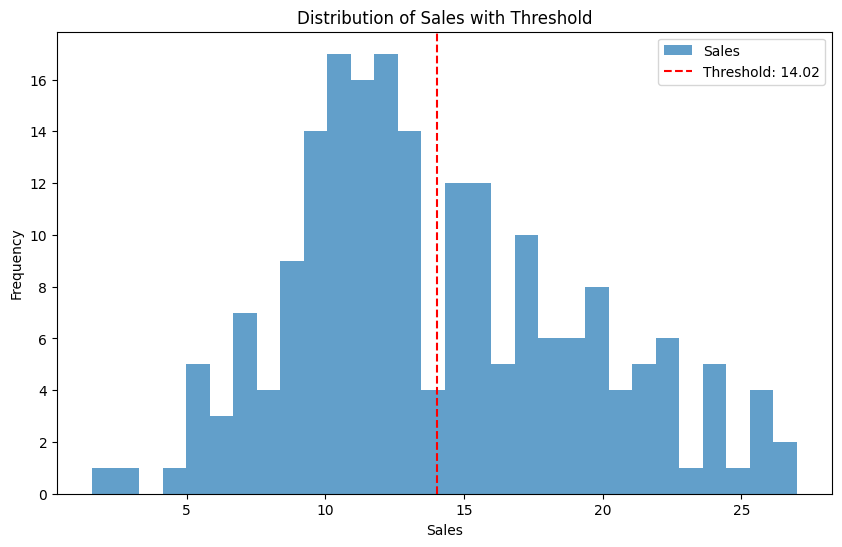

The threshold chosen is the average sales value. Sales above this threshold are classified as high sales (1), and sales below or equal to this threshold are classified as low sales (0). This choice helps to balance the classes and provides a meaningful distinction between high and low sales.


In [19]:
# Calculate the threshold
threshold = df['Sales'].mean()

# Convert the target variable into binary classes
df['High_Sales'] = (df['Sales'] > threshold).astype(int)

# Display relevant information
print(f"Threshold (Average Sales): {threshold:.2f}")
print(df['High_Sales'].value_counts())

# Plot the distribution of sales and the threshold
plt.figure(figsize=(10, 6))
plt.hist(df['Sales'], bins=30, alpha=0.7, label='Sales')
plt.axvline(threshold, color='r', linestyle='--', label=f'Threshold: {threshold:.2f}')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales with Threshold')
plt.legend()
plt.show()

# Explanation of threshold choice
print("The threshold chosen is the average sales value. Sales above this threshold are classified as high sales (1), and sales below or equal to this threshold are classified as low sales (0). This choice helps to balance the classes and provides a meaningful distinction between high and low sales.")
# add a new co

#### **1.2: Exploratory data analysis (5 points)**

- Display, print or plot any relevant information.
- How is each feature doing on this new classification task?

---

### **2. Classification (40 points)**

#### **2.1: Model Training and Evaluation (20 points)**

- Train several classification models and evaluate them.
- Display, print or plot any relevant information.
- Interpret the results.


# TODO explain

#### **2.2: PCA (20 points)**

- Apply PCA and train the classification model of your choice.
- Display, print or plot any relevant information.
- Discuss how PCA affects model performance and interpret the results.

# TODO explain

---

## **Task 3 (Bonus): Unsupervised Learning**

In this task, you will use unsupervised learning techniques to explore and segment the data based on advertising budgets.

### **1. Clustering (10 points)**

#### **1.1: K-Means (10 points)**

- Apply K-Means clustering to segment the data. Feel free to use any feature or combinaison.
- Display, print or plot any relevant information.
- Discuss the characteristics of each cluster.

1-NN Regression for TV:
Training Score: 1.0000
Test Score: -2.0256

2-NN Regression for TV:
Training Score: 0.5706
Test Score: -1.6412

3-NN Regression for TV:
Training Score: 0.4327
Test Score: -1.0806

4-NN Regression for TV:
Training Score: 0.3232
Test Score: -0.8400

5-NN Regression for TV:
Training Score: 0.2969
Test Score: -0.6116

6-NN Regression for TV:
Training Score: 0.2258
Test Score: -0.5000

7-NN Regression for TV:
Training Score: 0.1881
Test Score: -0.4137

8-NN Regression for TV:
Training Score: 0.1486
Test Score: -0.3340

9-NN Regression for TV:
Training Score: 0.1334
Test Score: -0.3212

10-NN Regression for TV:
Training Score: 0.1318
Test Score: -0.3176

11-NN Regression for TV:
Training Score: 0.1039
Test Score: -0.2694

12-NN Regression for TV:
Training Score: 0.1261
Test Score: -0.2375

13-NN Regression for TV:
Training Score: 0.1247
Test Score: -0.2138

14-NN Regression for TV:
Training Score: 0.1192
Test Score: -0.2099

15-NN Regression for TV:
Training Score: 0.

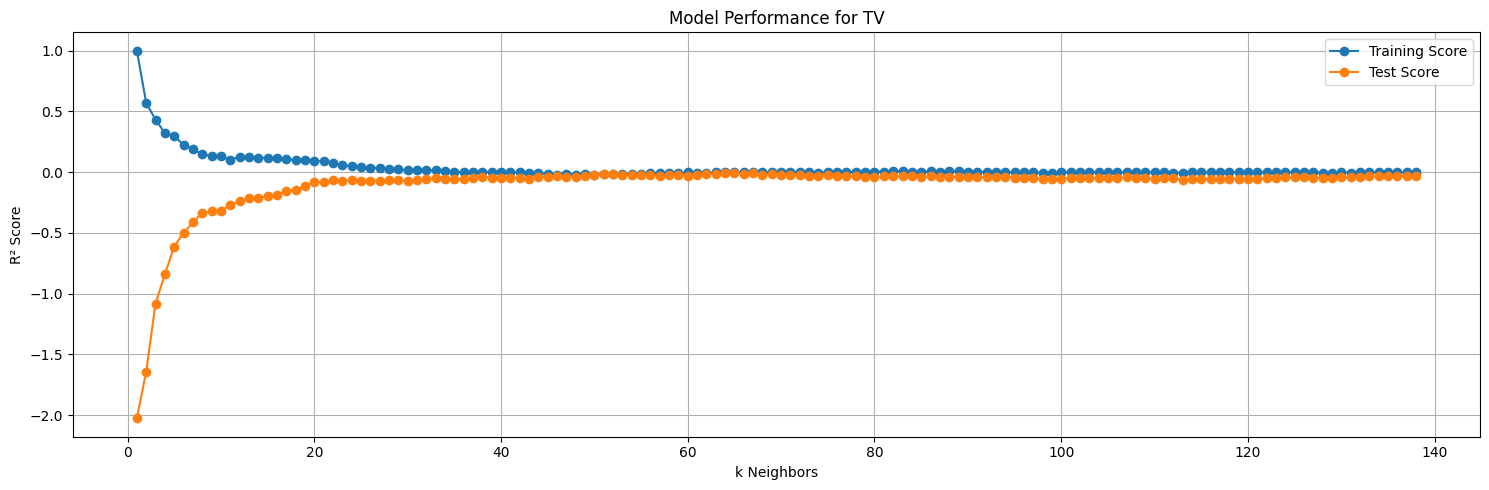

1-NN Regression for Radio:
Training Score: 0.9892
Test Score: 0.1626

2-NN Regression for Radio:
Training Score: 0.8146
Test Score: 0.3259

3-NN Regression for Radio:
Training Score: 0.7287
Test Score: 0.3352

4-NN Regression for Radio:
Training Score: 0.7005
Test Score: 0.4080

5-NN Regression for Radio:
Training Score: 0.7065
Test Score: 0.4329

6-NN Regression for Radio:
Training Score: 0.7044
Test Score: 0.4361

7-NN Regression for Radio:
Training Score: 0.6734
Test Score: 0.4314

8-NN Regression for Radio:
Training Score: 0.6661
Test Score: 0.4505

9-NN Regression for Radio:
Training Score: 0.6583
Test Score: 0.4590

10-NN Regression for Radio:
Training Score: 0.6657
Test Score: 0.4703

11-NN Regression for Radio:
Training Score: 0.6668
Test Score: 0.4934

12-NN Regression for Radio:
Training Score: 0.6728
Test Score: 0.4900

13-NN Regression for Radio:
Training Score: 0.6636
Test Score: 0.4961

14-NN Regression for Radio:
Training Score: 0.6614
Test Score: 0.5013

15-NN Regressio

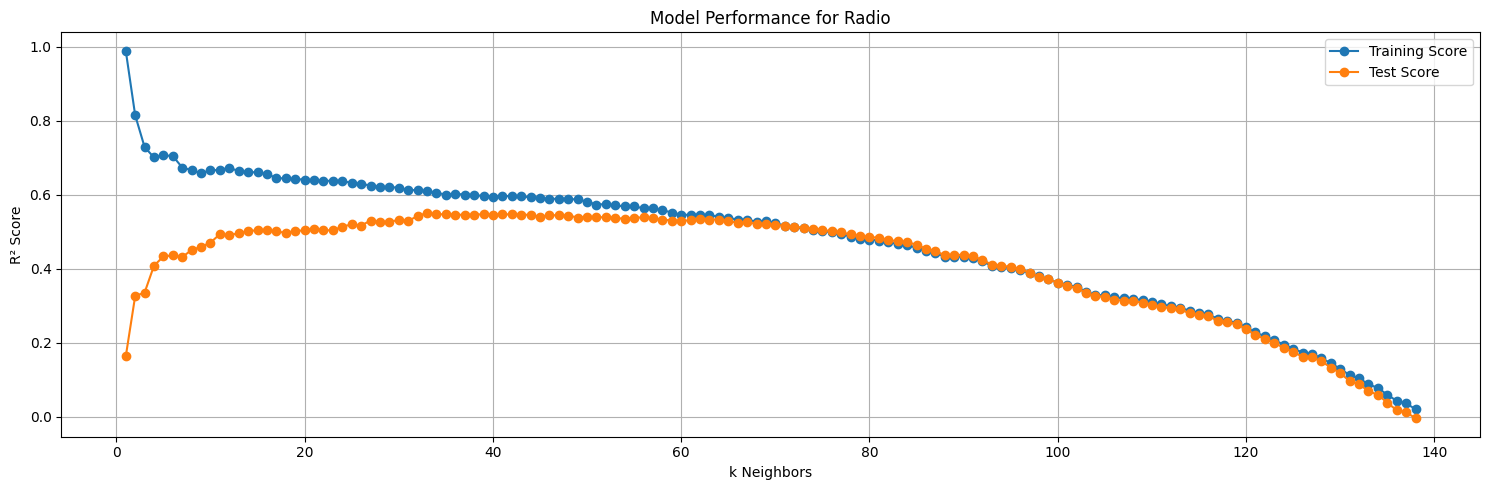

1-NN Regression for Newspaper:
Training Score: 0.8306
Test Score: -0.5164

2-NN Regression for Newspaper:
Training Score: 0.6310
Test Score: -0.0105

3-NN Regression for Newspaper:
Training Score: 0.5819
Test Score: 0.0166

4-NN Regression for Newspaper:
Training Score: 0.4994
Test Score: 0.1154

5-NN Regression for Newspaper:
Training Score: 0.4962
Test Score: 0.1449

6-NN Regression for Newspaper:
Training Score: 0.4820
Test Score: 0.1701

7-NN Regression for Newspaper:
Training Score: 0.4639
Test Score: 0.2175

8-NN Regression for Newspaper:
Training Score: 0.4624
Test Score: 0.2906

9-NN Regression for Newspaper:
Training Score: 0.4390
Test Score: 0.2995

10-NN Regression for Newspaper:
Training Score: 0.4368
Test Score: 0.3180

11-NN Regression for Newspaper:
Training Score: 0.4135
Test Score: 0.3254

12-NN Regression for Newspaper:
Training Score: 0.4167
Test Score: 0.2745

13-NN Regression for Newspaper:
Training Score: 0.3988
Test Score: 0.2977

14-NN Regression for Newspaper:


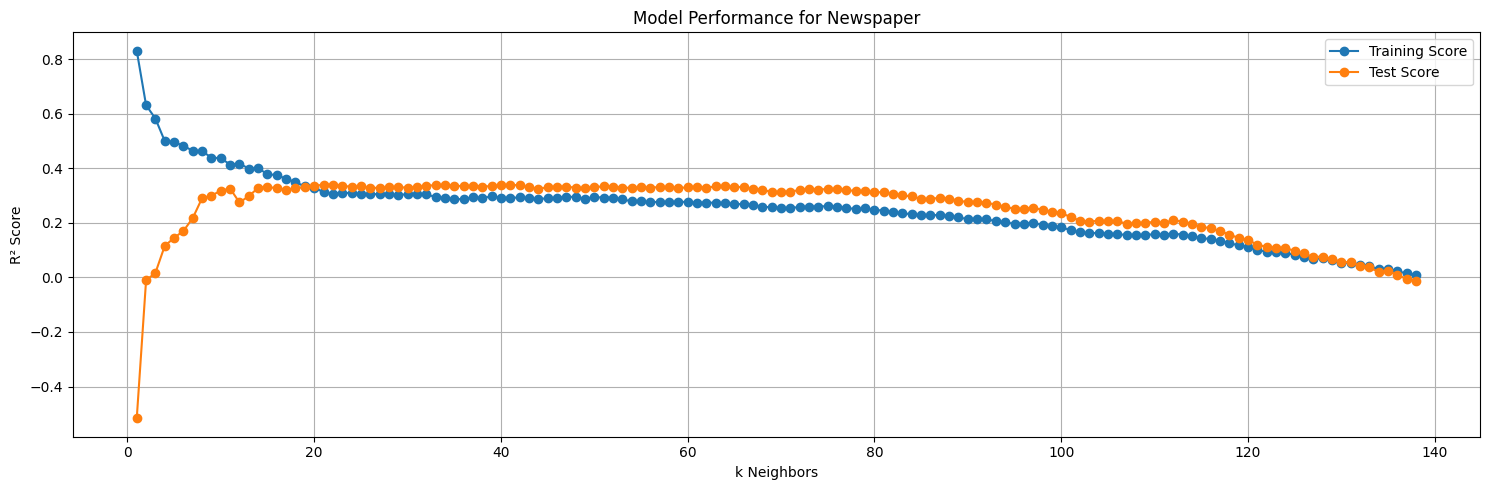

Best k for TV: 64 with Test Score: -0.0070
Best k for Radio: 33 with Test Score: 0.5506
Best k for Newspaper: 21 with Test Score: 0.3404


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Assuming features and target are already defined
# Assuming feature_names is a list of feature names

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Create a k-NN regression for each feature and try different values of k on each of them
k_values = np.arange(1, 139)

# Initialize lists to store the best k values and their corresponding scores
best_k_values = []
best_test_scores = []

for i in range(3):
    best_k = 0
    best_score = -np.inf
    train_scores = []
    test_scores = []
    for k in k_values:
        # Create and train the model
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(X_train[:, i].reshape(-1, 1), y_train)
        
        # Evaluate the model
        train_score = model.score(X_train[:, i].reshape(-1, 1), y_train)
        test_score = model.score(X_test[:, i].reshape(-1, 1), y_test)
        train_scores.append(train_score)
        test_scores.append(test_score)
        
        # Update the best k and score if the current test score is better
        if test_score > best_score:
            best_k = k
            best_score = test_score
        
        print(f'{k}-NN Regression for {feature_names[i]}:')
        print(f'Training Score: {train_score:.4f}')
        print(f'Test Score: {test_score:.4f}\n')
    
    best_k_values.append(best_k)
    best_test_scores.append(best_score)
    
    # Plot the training and test scores with a subplot for each feature and under the k model performance evolution
    plt.figure(figsize=(15, 5))
    plt.plot(k_values, train_scores, marker='o', label='Training Score')
    plt.plot(k_values, test_scores, marker='o', label='Test Score')
    plt.title(f'Model Performance for {feature_names[i]}')
    plt.xlabel('k Neighbors')
    plt.ylabel('R² Score')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Print the best k values and their corresponding test scores
for i in range(3):
    print(f'Best k for {feature_names[i]}: {best_k_values[i]} with Test Score: {best_test_scores[i]:.4f}')

# TODO explain